<font color="#CC3D3D"><p>
## Decision Tree Visualization

이번 실습을 위해 아래와 같이 필요한 SW(graphviz.exe) 및 패키지(graphviz, dtreeviz)를 설치해야 합니다.
1. graphviz-2.38.msi 다운로드
2. graphviz-2.38.msi을 실행시켜 graphviz 설치
3. 설치 후, 아래와 같이 Path 환경변수를 수정
  - 바탕화면에서 컴퓨터 아이콘을 마우스 오른쪽 단추로 클릭한 후 속성 선택
  - 고급 시스템 설정을 선택한 후 환경변수 버튼을 클릭
  - 시스템 변수 섹션에서 Path 환경 변수를 찾아 선택한 후 편집을 클릭
  - 새로 만들기 버튼을 눌러 입력란이 나타나면, 정확하게 `C:\Program Files (x86)\Graphviz2.38\bin`을 입력 후 확인 클릭
4. Anaconda Prompt에서 `pip install graphviz, dtreeviz` 실행

In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
import platform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dtreeviz.trees import *

#### Reading data

In [2]:
data = pd.read_csv('purchase_history.csv', encoding='cp949')
data

,custid,gender,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,...,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점
0,0,0,68282840,74,922741,11264000,35,28,17,19,...,3.593834e+06,3.894737,29084140.0,27.0,42601240.0,61.0,68282840,74,기타,강남점
1,1,0,2136000,3,712000,2136000,2,2,2,2,...,1.068000e+06,1.500000,2136000.0,3.0,2136000.0,3.0,2136000,3,스포츠,잠실점
2,2,1,3197000,4,799250,1639000,1,2,2,2,...,1.598500e+06,2.000000,NaN,NaN,NaN,NaN,3197000,4,기타,관악점
3,3,1,16077620,44,365400,4935000,24,20,13,18,...,8.932011e+05,2.444444,549620.0,4.0,1284060.0,11.0,16077620,44,기타,광주점
4,4,0,29050000,3,9683333,24000000,2,3,3,2,...,1.452500e+07,1.500000,27000000.0,2.0,27000000.0,2.0,29050000,3,기타,본 점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,2,1587600,3042900,1,2,2,1,...,3.175200e+06,2.000000,NaN,NaN,NaN,NaN,3175200,2,기타,본 점
3496,3496,1,29628600,13,2279123,7200000,9,7,5,8,...,3.703575e+06,1.625000,12028000.0,7.0,19224000.0,11.0,29628600,13,시티웨어,부산본점
3497,3497,0,75000,1,75000,75000,1,1,1,1,...,7.500000e+04,1.000000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점
3498,3498,0,1875000,2,937500,1000000,1,1,1,2,...,9.375000e+05,1.000000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점


#### Feature engineering

In [3]:
data = data.fillna(0)
data = pd.get_dummies(data)

X = data.drop(['custid', 'gender'], axis=1)
y = data.gender

X

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,68282840,74,922741,11264000,35,28,17,19,17,0.527027,...,0,0,0,0,0,0,0,0,0,0
1,2136000,3,712000,2136000,2,2,2,2,1,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,3197000,4,799250,1639000,1,2,2,2,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,16077620,44,365400,4935000,24,20,13,18,16,0.318182,...,0,0,0,0,0,0,0,0,0,0
4,29050000,3,9683333,24000000,2,3,3,2,85,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3175200,2,1587600,3042900,1,2,2,1,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
3496,29628600,13,2279123,7200000,9,7,5,8,40,0.461538,...,0,0,0,0,0,0,0,0,0,0
3497,75000,1,75000,75000,1,1,1,1,0,0.000000,...,0,0,0,0,0,0,0,1,0,0
3498,1875000,2,937500,1000000,1,1,1,2,39,0.000000,...,0,0,0,0,0,0,0,0,0,0


#### Data splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#### Modeing

In [5]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train, y_train).score(X_test, y_test)

0.608

#### Evaluation

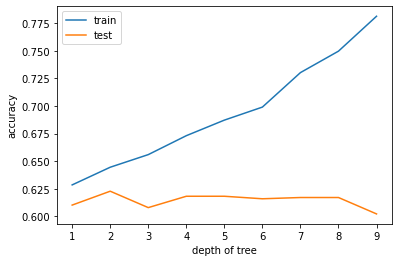

In [6]:
x = range(1,10)
y1 = [DecisionTreeClassifier(max_depth=i, random_state=123).fit(X_train, y_train).score(X_train, y_train) for i in x]
y2 = [DecisionTreeClassifier(max_depth=i, random_state=123).fit(X_train, y_train).score(X_test, y_test) for i in x]
plt.plot(x,y1,label='train')
plt.plot(x,y2,label='test')
plt.xlabel('depth of tree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Check feature importance

In [7]:
# 차트에서 한글 출력을 위한 설정
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

<AxesSubplot:>

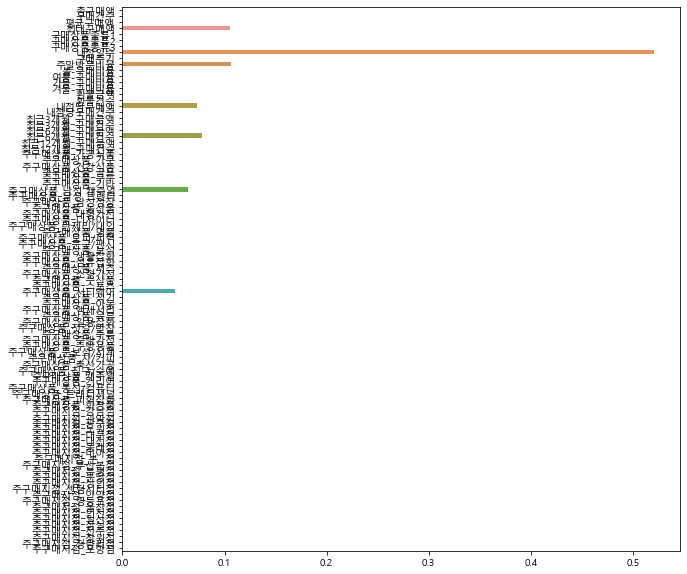

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(x=clf.feature_importances_, y=data.columns[2:])

#### Visualize decision tree using [graphviz](http://scikit-learn.org/stable/modules/tree.html)

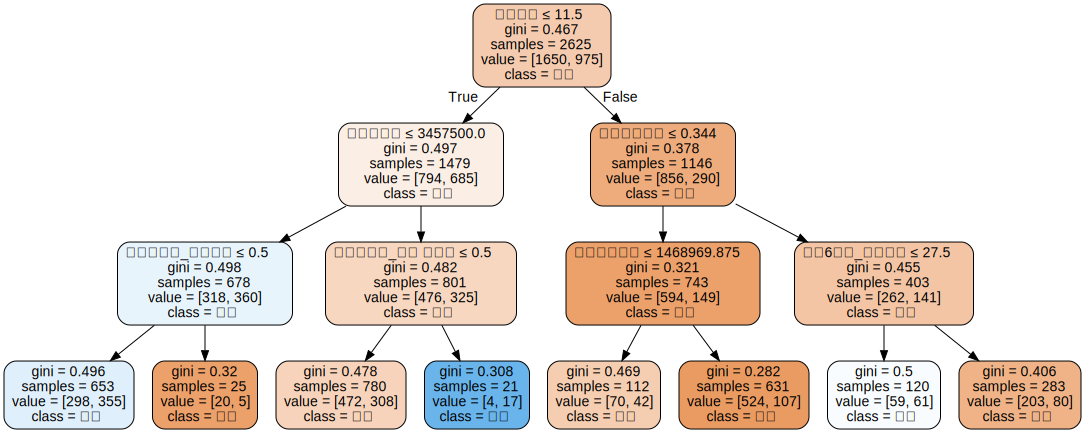

In [9]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file="tree.dot",
                feature_names=X_train.columns,
                class_names=['여자','남자'],
                filled=True, rounded=True,
                special_characters=True)  

with open("tree.dot", encoding='utf-8') as f:  # 한글 처리
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='tree', cleanup=True)
    
dot

### Visualize decision tree using [dtreeviz](https://github.com/parrt/dtreeviz)

In [10]:
from sklearn.datasets import load_iris

In [11]:
classifier = tree.DecisionTreeClassifier(max_depth=2, random_state=0) 
iris = load_iris()
classifier.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=2, random_state=0)

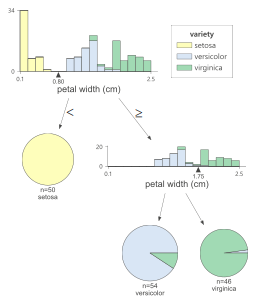

In [12]:
viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz

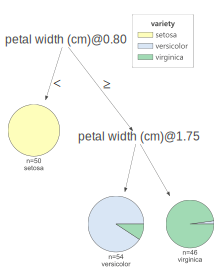

In [13]:
# Decision tree without scatterplot or histograms for decision nodes

viz = dtreeviz(classifier,
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               fancy=False )  # fance=False to remove histograms/scatterplots from decision nodes
              
viz

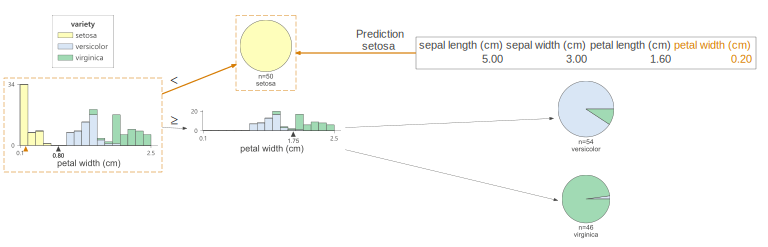

In [14]:
# Prediction path

X = iris.data[np.random.randint(0, len(iris.data)),:]  # random sample from training
viz = dtreeviz(classifier,
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               orientation ='LR',  # left-right orientation
               X=X)  # need to give single observation for prediction
              
viz

<font color="#CC3D3D"><p>
## End